In [2]:
from games.SIR import SIR_Game
from games.ring import ring_Game
import numpy as np 
import torch 
from games.controller import ring_control
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
W = np.array([
    [0.8,0.4],
    [0.4, 0.8]
])
K = len(W)

game = SIR_Game(W,K=2)
game.lam = 2.0
control = ring_control(np.arange(11))
game = ring_Game(W,K=2,Controller=control)
lr = 2.0
tol = 1.0 
threshold = 4*1e-4
MAX_ITER = 100

for i in range(MAX_ITER):
    '''
    obtain the stable mean field under the current policy, 
    and do the policy improvement
    '''
    
    game.mean_field = game.random_mf()
    game.pop_inf(iter=1000)
    pi_prev = game.pi.copy()
    temp = np.zeros((game.K,game.nstate,game.naction))
    for k in range(game.K):
        Q = game.Gamma_q_func(k)
        for s in range(game.nstate):
            q = Q[s]
            temp[k,s] = game.mirror(k,s,q,eta=lr)
    
    game.pi = temp.copy()
    tol_1 = np.sum(np.abs(game.pi-pi_prev))
    tol = min(tol,tol_1)
    print("The {} th iteration, the convergence is: tol= {}".format(i+1, tol)) 
    if tol<threshold:
        print("Converge to the equilibrium with tol ={} ".format(tol))
        break 

mf = np.mean(game.mean_field,axis=0)
pi = game.pi[0]

The 1 th iteration, the convergence is: tol= 1.0
The 2 th iteration, the convergence is: tol= 0.23184602585719238
The 3 th iteration, the convergence is: tol= 0.034695007462596794
The 4 th iteration, the convergence is: tol= 0.005198032005913289
The 5 th iteration, the convergence is: tol= 0.0008564594624741462
The 6 th iteration, the convergence is: tol= 0.00044976835503751644
The 7 th iteration, the convergence is: tol= 0.00044976835503751644
The 8 th iteration, the convergence is: tol= 0.00044976835503751644
The 9 th iteration, the convergence is: tol= 0.00044935009309621243
The 10 th iteration, the convergence is: tol= 0.0003839011445714302
Converge to the equilibrium with tol =0.0003839011445714302 


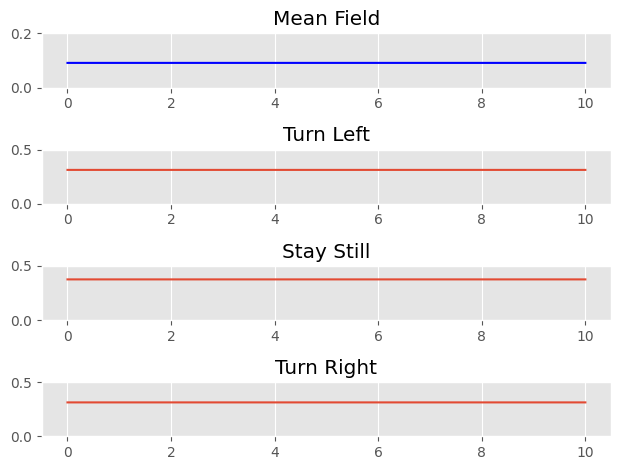

In [6]:
fig, axs = plt.subplots(4,1)
axs[0].plot(mf,label = "Mean Field ",color = 'blue')
axs[0].set_title("Mean Field")
axs[0].set_ylim(0,0.2)
axs[1].plot(pi[:,0])
axs[1].set_title("Turn Left")
axs[1].set_ylim(0,0.5)
axs[2].plot(pi[:,1])
axs[2].set_title("Stay Still")
axs[2].set_ylim(0,0.5)
axs[3].plot(pi[:,2])
axs[3].set_title("Turn Right")
axs[3].set_ylim(0,0.5)

fig.tight_layout()
plt.savefig("./result/ring/ring_control_{}.png".format(game.nstate))
plt.show()

In [8]:
pi[0]

array([0.31255792, 0.37488895, 0.31255314])